## PAUTA Notebook 2:  Clustering con GMM y Algoritmos Jerárquicos

En este notebook vamos a implementar el algoritmo de clustering de Mezcla de Normales en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Se incluye además la estrategia para definir el número de grupos k. Al final se propone un ejercicio con nuevos datos, con el fin de aprender a utilizar el algoritmo. 

In [4]:
library(mclust)
library(cluster)
#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("milk1.dat",row.names=1,dec=".",header=TRUE)
summary(datos)

     WATER          PROTEIN            FAT           LACTOSE     
 Min.   :44.90   Min.   : 0.600   Min.   : 1.00   Min.   :0.000  
 1st Qu.:71.30   1st Qu.: 3.000   1st Qu.: 3.40   1st Qu.:2.700  
 Median :82.00   Median : 5.900   Median : 6.30   Median :4.700  
 Mean   :78.18   Mean   : 6.212   Mean   :10.31   Mean   :4.132  
 3rd Qu.:87.70   3rd Qu.: 9.700   3rd Qu.:13.10   3rd Qu.:5.600  
 Max.   :90.40   Max.   :12.300   Max.   :42.00   Max.   :6.900  
      ASH        
 Min.   :0.1000  
 1st Qu.:0.5300  
 Median :0.8000  
 Mean   :0.8632  
 3rd Qu.:1.1000  
 Max.   :2.3000  

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust EEV (ellipsoidal, equal volume and shape) model with 3 components: 

 log-likelihood  n df       BIC       ICL
      -144.2366 25 52 -455.8548 -455.8584

Clustering table:
 1  2  3 
14  5  6 

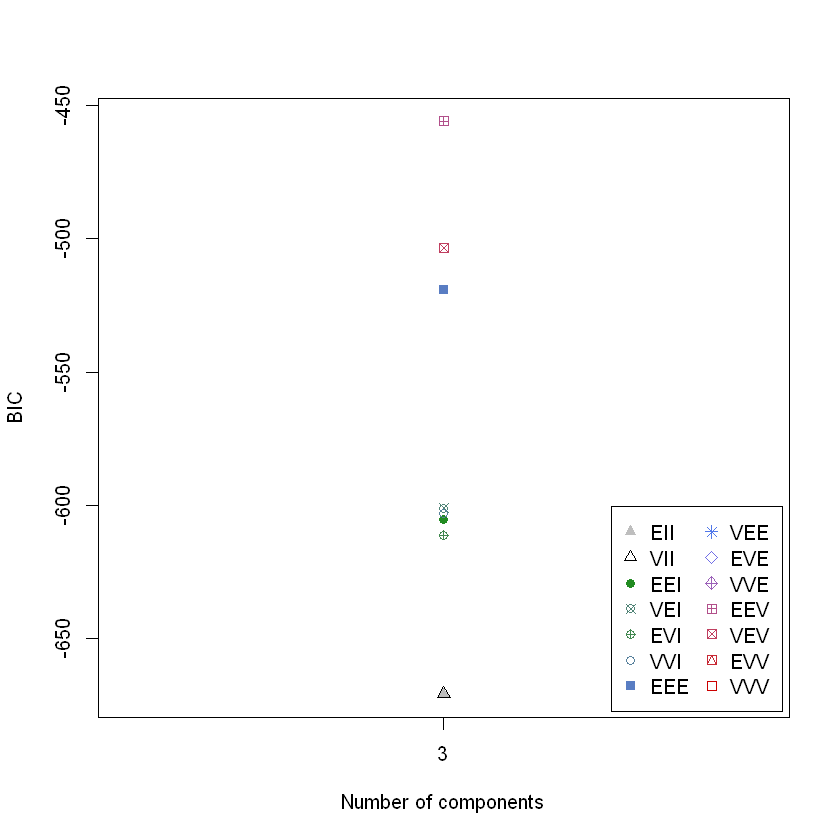

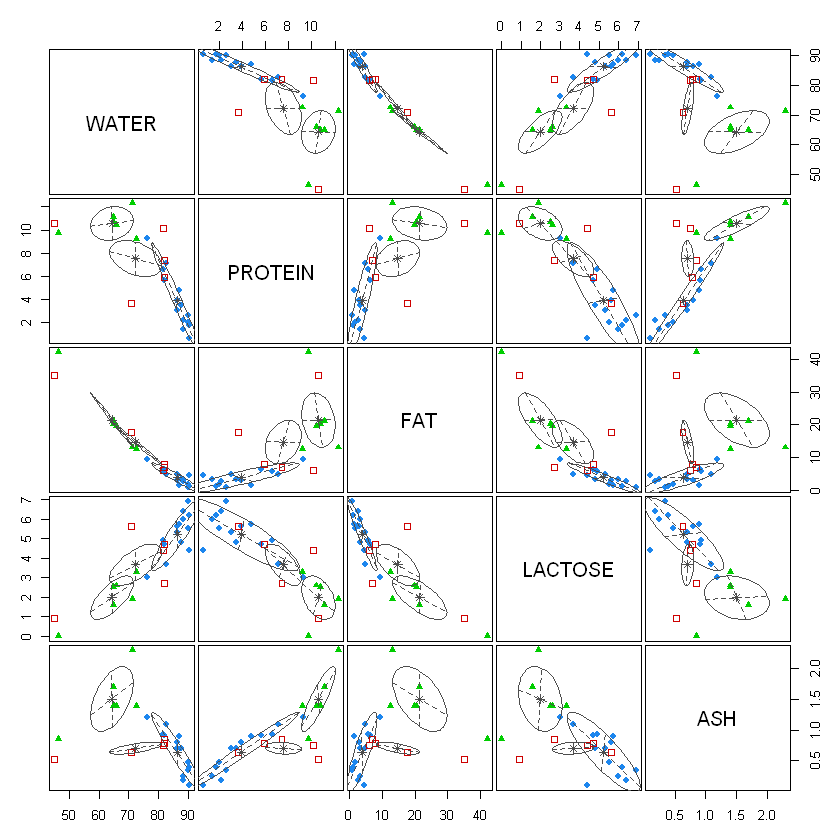

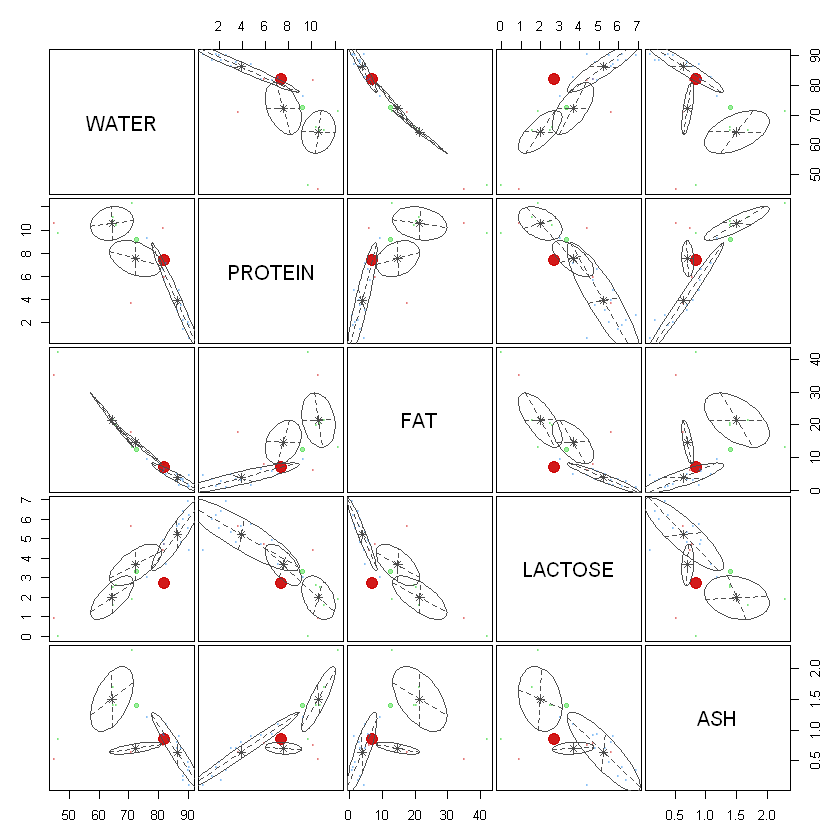

'Mclust' model object: (EEV,3) 

Available components: 
 [1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "loglik"        
 [9] "df"             "bic"            "icl"            "hypvol"        
[13] "parameters"     "z"              "classification" "uncertainty"   

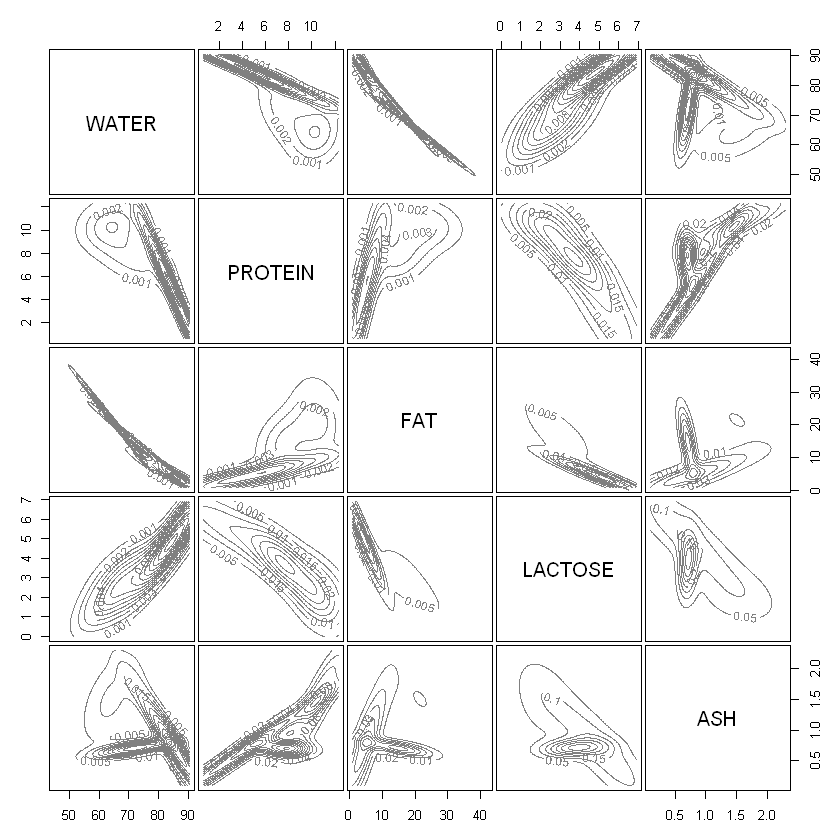

In [5]:
clus <-Mclust(datos, G=3)
summary(clus)
plot(clus)
clus




In [3]:
cl <- clus$classification
centers <- t(clus$parameters$mean)
centers
cl


WATER,PROTEIN,FAT,LACTOSE,ASH
86.26361,3.879049,3.921919,5.221110,0.6421765
72.23683,7.520039,14.782487,3.660315,0.7079534
64.28310,10.566706,21.483587,1.983296,1.5083364


HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         1          1          1          1          1          1          1 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         2          2          2          1          1          1          1 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         1          1          1          2          3          3          3 
  REINDEER      WHALE       SEAL    DOLPHIN 
         3          3          3          2

**Ejercicio 1:**

a) Explique como funciona el método Mclust, describa los principales parámetros de entrada y salida.

b) Interprete y comente los resultados obtenidos. 

#### Respuesta Ejercicio 1:

(a) Mclust es un método que permite ajustar un modelo de mezcla de normales a un conjunto de datos, bajo el supuesto que las variables involucradas se distribuyen según normales multivariadas. El modelo es estimado usando el algoritmo EM, tomando como agrupamiento inicial el obtenido mediante un agrupamiento jerárquico aglomerativo. El modelo óptimo es obtenido utilizando el criterio de información Bayesiano (BIC).

Sus principales parámetros de entrada son:

    data: los datos de las variables que serviran para hacer el clustering
    G: Nro de Gruposm, por omisión el método evalua desde 1, 2 a 9 grupos.
    modelNames: string describiendo las distintas configuraciones de la distribución normal multivariada utilizada en el algoritmo EM. Por omisión el método evalúa 14 configuraciones distintas
    prior: posible distribución a priori definida por el usuario, por omisión no se provee.
    control: parámetros de control del algoritmo EM, por omisión no se provee.
    initializatin: parámetros para el clustering inicial, por omisión no se provee.
    warn: valor lógico asociado al manejo de advertencias (warnings)
    x: un objeto de la clase mclustBIC que utiliza un ajuste anterior para proveer los valores BIC de los distintos modelos.

La salida del método es un objeto de la clase Mclust, cuyas principales componentes son:

    data: la matriz con los datos en la entrada
    modelName: String que describe el modelo que obtuvo el valor óptimo del BIC
    n: número de observaciones en los datos
    d: dimensión de los datos (Nro de variables)
    G: el número óptimo de grupos
    BIC: todos los valores de BIC calculados.
    ICL: log de la verosimilitud del modelo con BIC óptimo
    df: Número de parámetros estimados
    bic: valor BIC del modelo seleccionado
    z: una matriz cuya componente [i,k] es la probabilidad de que la observación i en el data set pertenezca a la clase k.
    classification: la clasificación correspondiente a z, es decir la clase de mayor probabilidad para cada observación.
    parameters: pro, mean y variance: proporción, media y varianza estimadas de cada clase

(b) El valor máximo de BIC se observa en G=3 para el modelo "EEV", que corresponde a una normal multivariada elipsoidal de igual forma y volumen. El grupo 1 se caracteriza por altos valores de agua y lactosa, el Grupo 2 corresponde a valores medios de todos los componentes y el Grupo3 se caracteriza por altos valores de proteína, grasa y calcio.

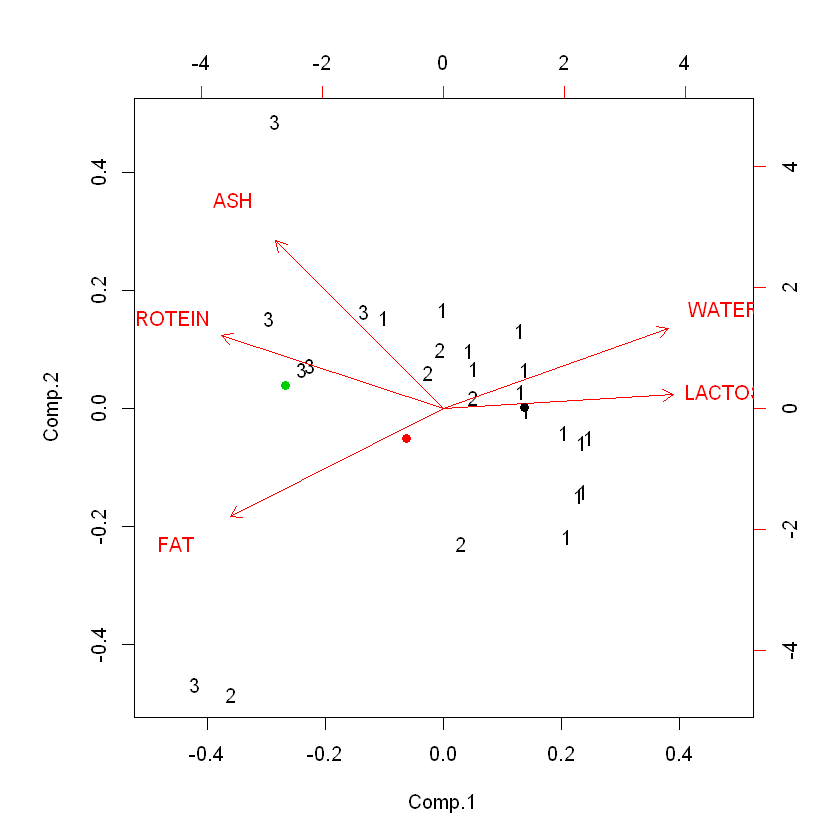

In [4]:
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
res2 <- predict(res,centers)

biplot(res,xlabs=cl)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:9,pch=19)


**Criterio de Información Bayesiano**

Una forma de discriminar entre posibles agrupamientos, es calcular el Criterio de Información Bayesiano, cuya expresión genérica es:
$$BIC = log L(Datos\mid \hat{\theta}) - \frac{d}{2}log(N)$$
donde $d$ es el número de parámetros libres y $N$ el número de observaciones. A medida que aumenta el número de parámetros la verosimilitud aumenta, pero esto es moderado por el término en que depende de $d$.

Mclust calcula automática el BIC para distintas configuraciones de las matrices covarianza de cada Normal multivariada (que corresponden a distintos números de parámetros) así como distinto número de grupos. Por parsimonia, es recomendable escoger el primer número de grupos que representa un máximo local.

**Ejercicio 2:**

a) Utilice Mclust sin definir el número de grupos y considere el Criterio de información Bayesiano (BIC) para decidir el número de grupos óptimo. 

b) Discuta y compare  sus resultados con aquellos obtenidos con k-means

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust EEV (ellipsoidal, equal volume and shape) model with 9 components: 

 log-likelihood  n  df       BIC       ICL
       69.49069 25 148 -337.4122 -337.4122

Clustering table:
1 2 3 4 5 6 7 8 9 
3 3 6 3 2 1 1 4 2 

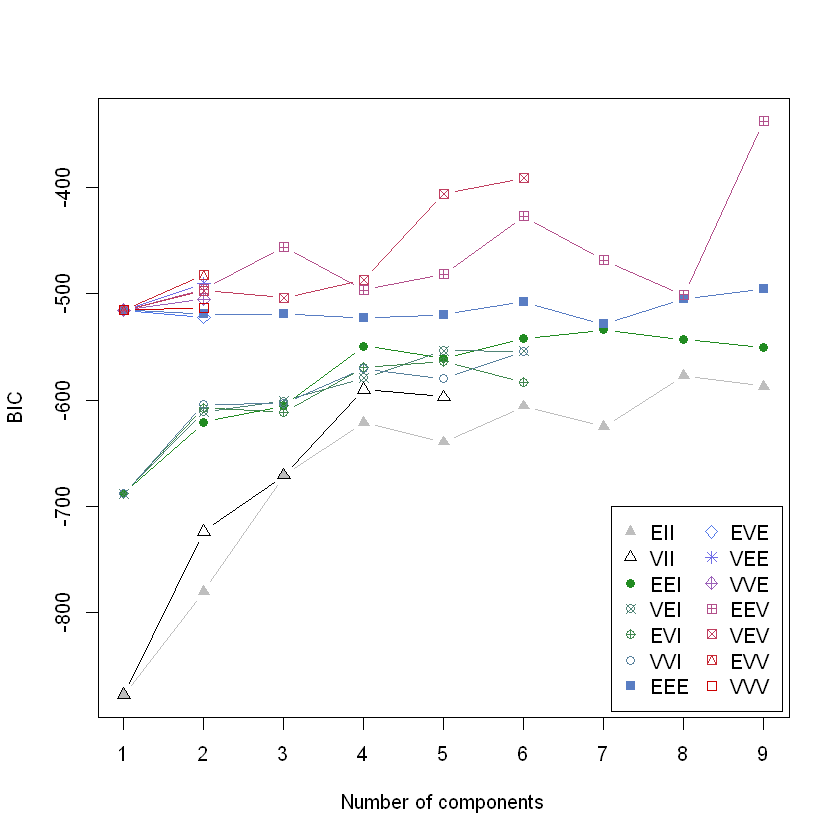

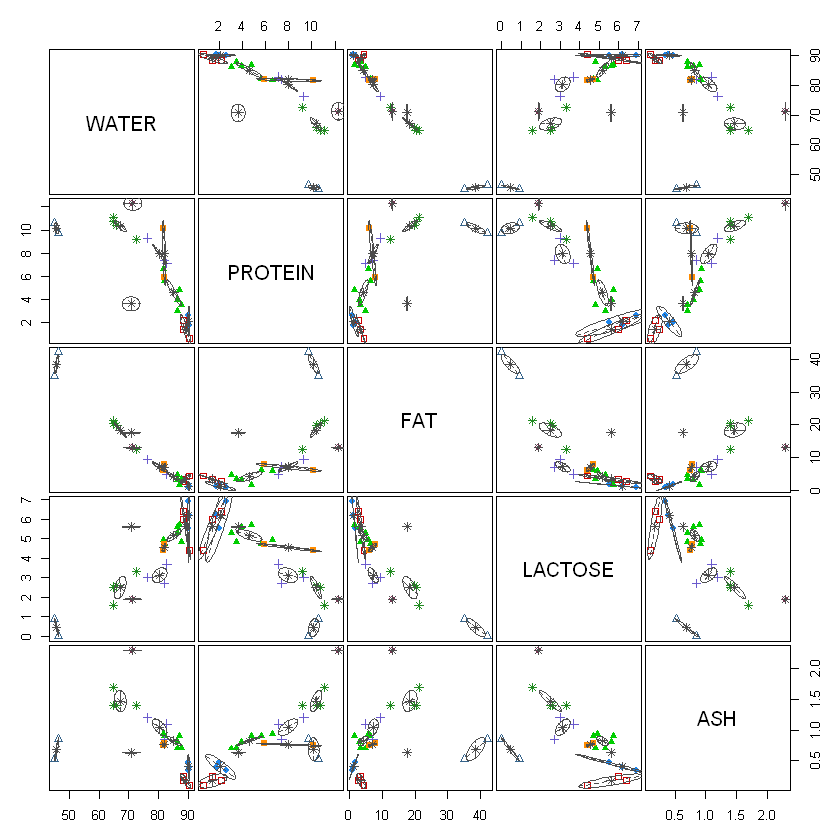

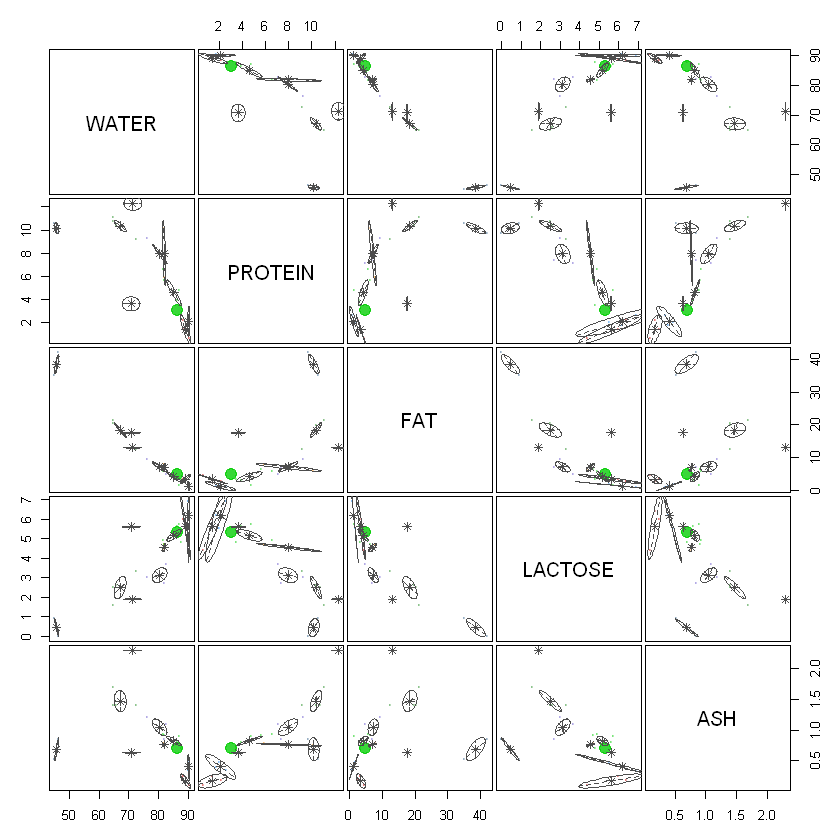

'Mclust' model object: (EEV,9) 

Available components: 
 [1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "bic"           
 [9] "loglik"         "df"             "hypvol"         "parameters"    
[13] "z"              "classification" "uncertainty"   

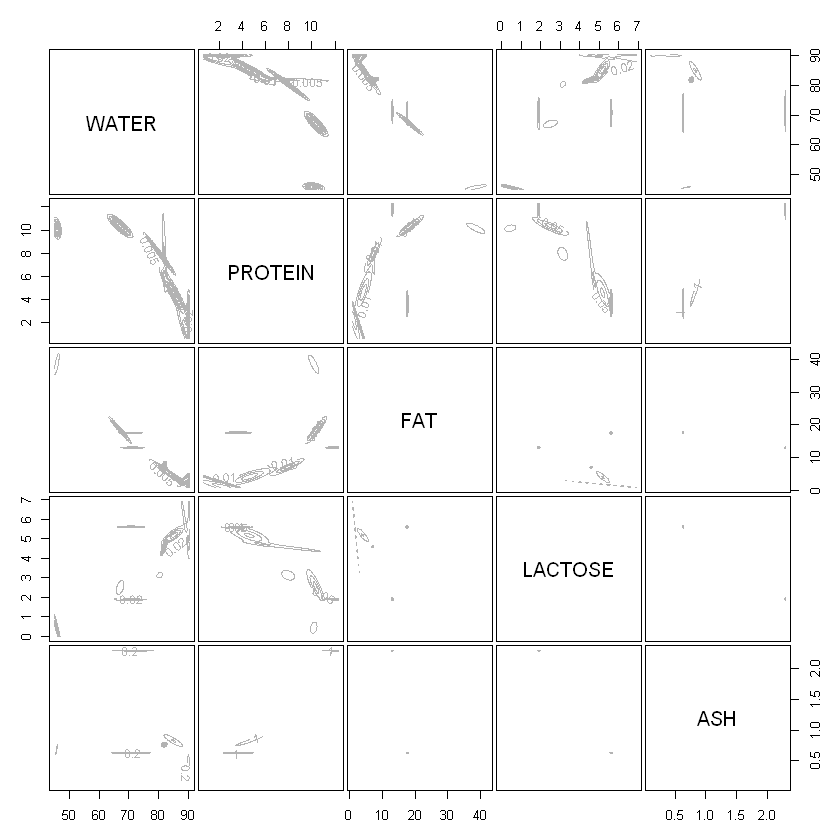

In [5]:
clus <-Mclust(datos)
summary(clus)
plot(clus)
clus

#### Respuesta Ejercicio 2:

**(a)**
De acuerdo al gráfico de BIC, en G=3 tenemos un primer máximo local. Los siguientes máximos locales se ubican en G=6 y G=9. Puesto que para G=3 tenemos una buena interpretación, es razonable quedarnos con este número de grupos.

**(b)** 
Con ambos métodos se ajusta un modelo de 3 grupos, sin embargo los grupos de kmeans son mas definidos geométricamente (se pueden definir zonas) en cambio en el caso de GMM existen zonas de traslape, y esto ocurre por que lo que se obtienen son probabilidades de pertenecer a un grupo u otro. Esta característica hace que GMM sea mas robusto ante pequeños errores en los datos o variaciones de los mismos.

En lo que sigue, utilizaremos el método hclust, que permite realizar análisis de agrupamiento jerárquico

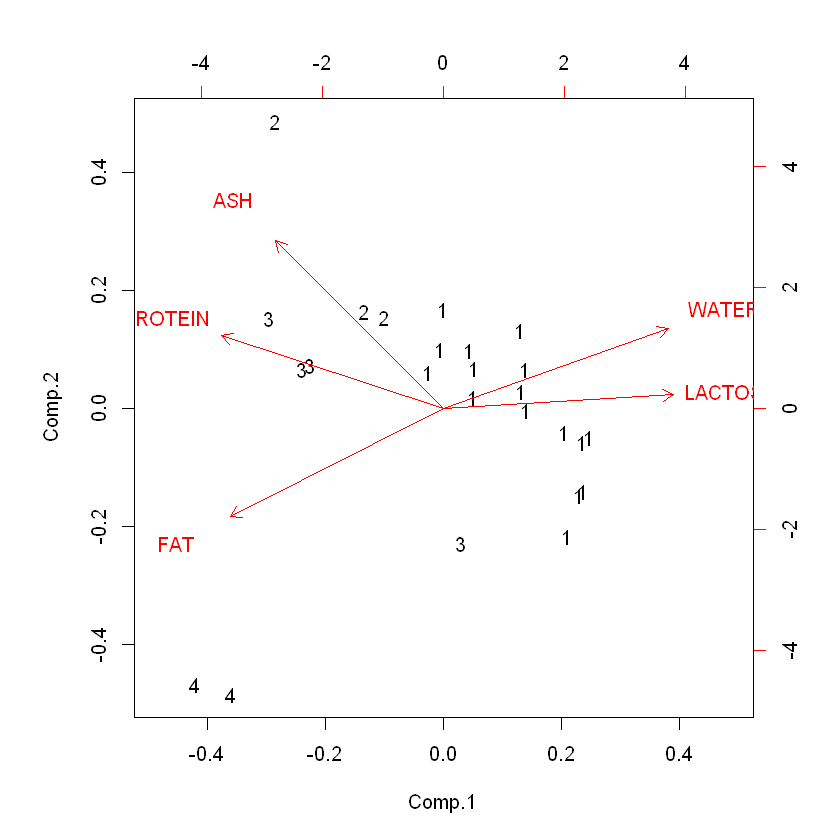

In [6]:
res3 <- hclust(dist(datos))
biplot(res, xlabs= cutree(res3,4))

**Ejercicio 3:** 

a) Explique como funciona el método hclust, describa parámetros de entrada y salida.

b) Interprete y comente los resultados obtenidos. 

c) Utilice otros parámetros en hclust y discuta como varían los resultados. 

#### Respuesta Ejercicio 3:

**(a)** Este método desarrolla un análisis jerárquico aglomerativo, que considera que inicialmente cada observación representa un grupo, y luego en cada paso va agrupando observaciones hasta llegar a un sólo grupo. El criterio de agrupamiento está basado en la matriz de disimilaridades (distancias) que se provee como argumento y el método considerado para definir la distancia entre grupos ("single", "complete", "average", etc)

Los principales parámetros de entrada son:
-   d: la matriz de disimilaridades tal como la producida por el método dist.  
- method: el método de aglomeración definido (("single", "complete", "average", etc.), por omisión utiliza "complete".
- members: permite identificar grupos iniciales a partir de los cuales se desarrolla el algoritmo aglomerativo

La salida del método es un objeto de la clase hclust, cuyas principales componentes son:
- merge: una matriz de (n-1)x2 que contiene en cada fila, un paso en el algoritmo aglomerativo, descritos por los índices (con signo -) de las observaciones que se agrupan, o el número del paso (con signo +) del paso anterior en que se definió el grupo que se va a fusionar.
- height: el valor de la disimilaridad entre grupos que dio origen a la fusión de dos grupos en cada uno de los n-1 pasos.
- order: un vector que da la permutación de las observaciones originales adecuadas para graficar, para no tener cruces de ramas.

Además es útil la función cutree, que tiene como parámetros un objeto de tipo hclust, el número de grupos definidos o bien un valor de corte para height y devuelve el grupo al que pertenece cada observación.

**(b)** el agrupamiento obtenido con 3 grupos es muy similar a aquel que se obtiene con kmeans. Y esto es coherente con que la función de disimilaridad es la euclidiana, o sea se trata de un criterio geométrico también.

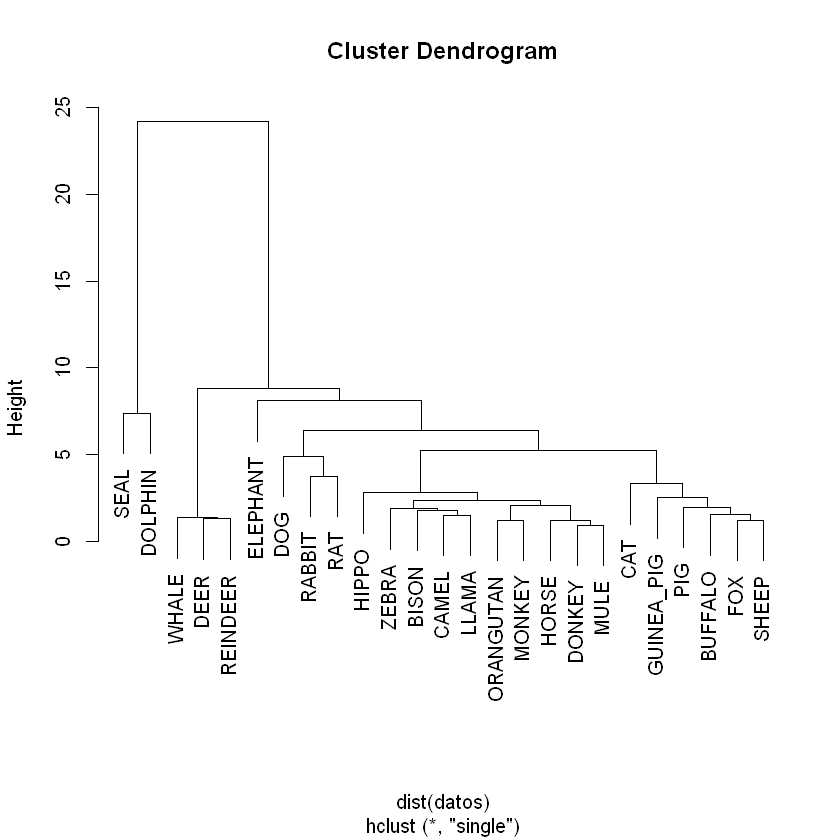

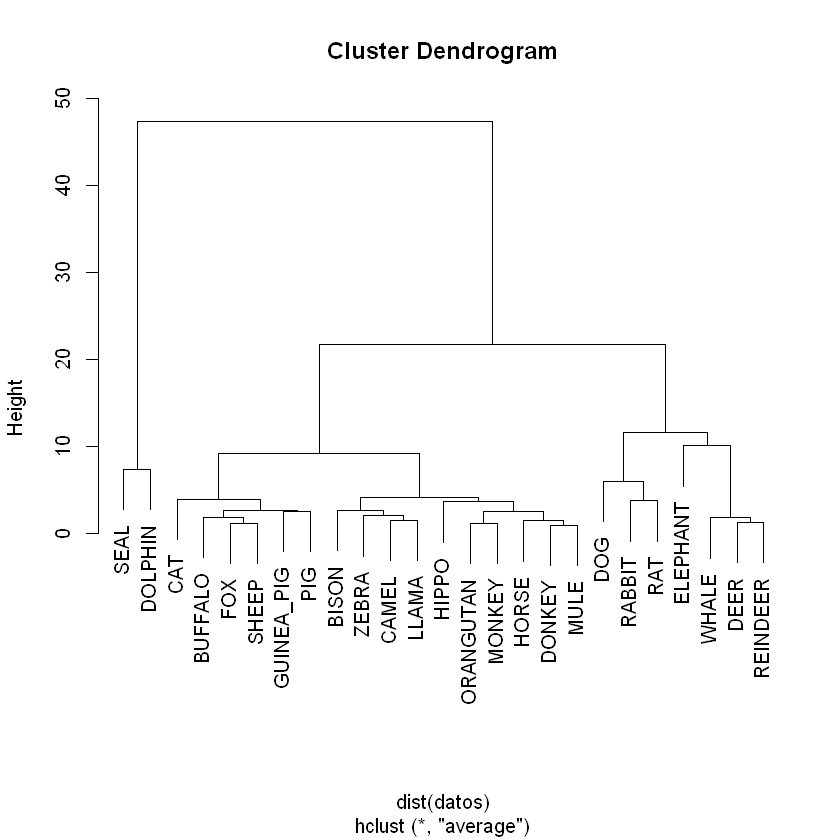

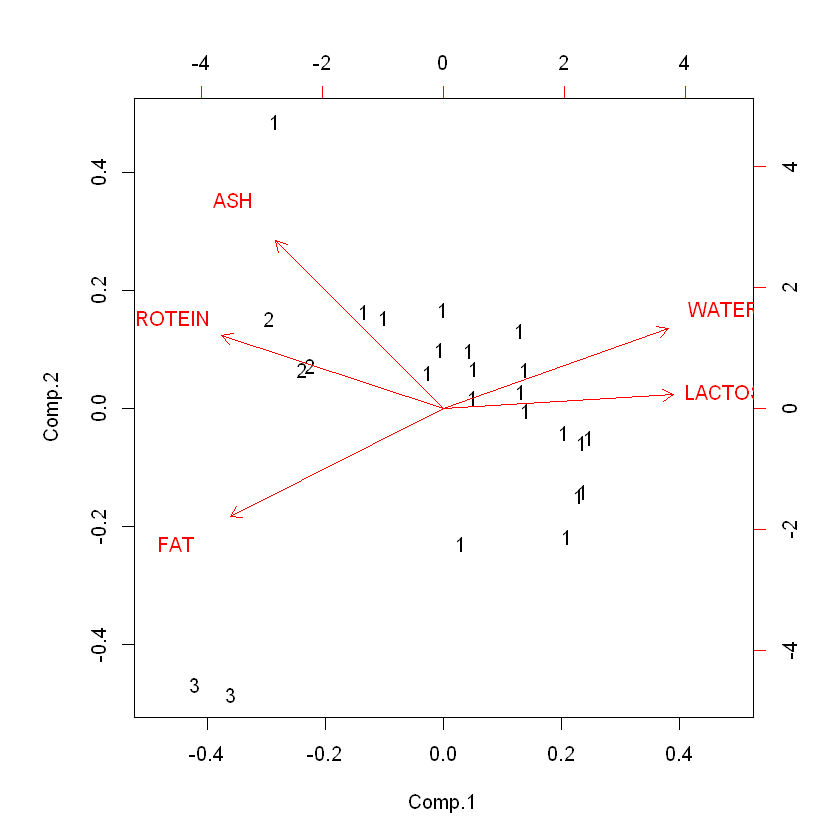

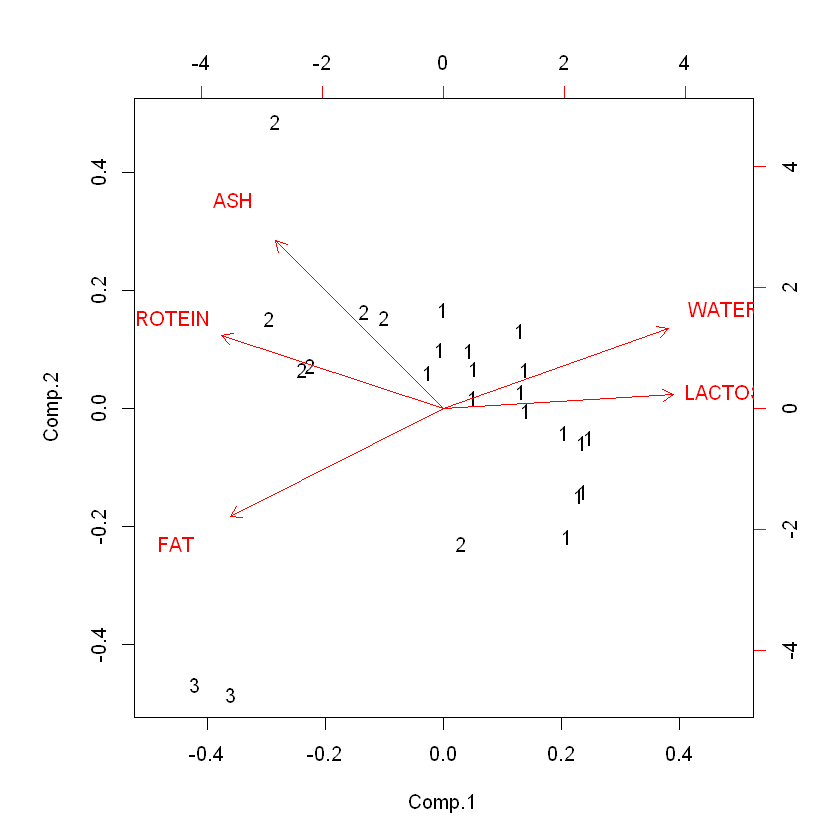

In [7]:
res4 <- hclust(dist(datos),method="single")
res5 <- hclust(dist(datos),method="average")
plot(res4)
plot(res5)
biplot(res, xlabs= cutree(res4,3))
biplot(res, xlabs= cutree(res5,3))

**(c)** Para este conjunto de datos, las diferencias en el agrupamiento son pequeñas. La principal diferencia se encuentra en el grupo 1 que es mas amplio (en desmedro del grupo 2) en el caso de los métodos "single" y "average" que en el caso "complete". 

**Ejercicio 4:** (3 puntos)

a) Considere los datos comunas.csv y escoja las comunas de una sola región para realizar sus análisis. Realice un análisis de clustering con K-means, GMM y Análisis Jerárquico para dichos datos, excluyendo el índice IDSE. Interprete sus resultados.

b) Estudie las medidas de calidad propuestas en Murphy, Capítulo 25: purity, rand index y mutual information (pdf en siveducMD). Calcule alguna de las medidas de calidad estudiadas, para cada uno de los análisis realizado en (a), considerando  una categorización (IDSE_bis) de los datos según el índice IDSE, de la manera siguiente:
1. IDSE_bis = 1 si 0 <= IDSE < 0.3
2. IDSE_bis = 2 si 0.3 <= IDSE < 0.4
3. IDSE_bis = 3 si 0.4 <= IDSE < 0.5
4. IDSE_bis = 4 si 0.5 <= IDSE < 0.6
5. IDSE_bis = 5 si 0.6 <= IDSE < 0.7
6. IDSE_bis = 6 si 0.7 <= IDSE < 0.8
7. IDSE_bis = 7 si 0.8 <= IDSE < 0.9
8. IDSE_bis = 8 si 0.9 <= IDSE < 1


Discuta sus resultados.

**No se desarrolla pauta porque depende de la región considerada**

Para el caso de la medida de calidad, se sugiere usar purity que se calcula del modo siguiente:

In [8]:
purity <- function(clusters, clases) {
  sum(apply(table(clases, clusters), 2, max)) / length(clusters)
}